<a href="https://colab.research.google.com/github/naza-campioni/fishery-models-tutorial/blob/main/xsa_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook example to use the XSA model from Shepherd (1999) - Extended Survivors Analysis: an improved method for the estimation of stock abundance from catch and survey data**

In [311]:
!git clone https://github.com/naza-campioni/fishery-models-tutorial.git

Cloning into 'fishery-models-tutorial'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 143 (delta 54), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (143/143), 231.28 KiB | 4.63 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [312]:
import sys
sys.path.append('/content/fishery-models-tutorial/XSA')

In [313]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from tabulate import tabulate

In [314]:
# Go to repo directory (only if you've already cloned it)
%cd /content/fishery-models-tutorial
!git pull       # to pull changes

/content/fishery-models-tutorial
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (4/4), 1022 bytes | 1022.00 KiB/s, done.
From https://github.com/naza-campioni/fishery-models-tutorial
   ae4000b..0d5ec84  main       -> origin/main
Updating ae4000b..0d5ec84
Fast-forward
 XSA/xsa_model.py | 1 -
 1 file changed, 1 deletion(-)


In [315]:
import xsa_model

In [316]:
importlib.reload(xsa_model)

<module 'xsa_model' from '/content/fishery-models-tutorial/XSA/xsa_model.py'>

In [317]:
from xsa_model import main_XSA

Create synthetic data

In [354]:
np.random.seed(42)

a, y = 5, 7
sigma = np.random.normal(loc=1.5, scale=.3, size = a) + 0.1 # error

C_ay = np.zeros((a,y))
u_ay = np.zeros((a,y))

for i in range(a):
  C_ay[i,:] = np.random.randint(low=(1400-100*i), high=(1500-100*i), size=(y))

for i in range(a):
  u_ay[i,:] = np.random.randint(low=(140-10*i), high=(150-10*i), size=(y))

w = np.random.random(size=(a, y)) # random weights

for i in range(a):
  w[i,:] = w[i,:] / sigma[i]**2

w = np.sort(w, axis=1)[:,::-1] # downweight old data
# w /= np.sum(w, axis=1, keepdims=True)

# w = np.ones((a,y),dtype=np.float64)

In [355]:
print(tabulate(C_ay))

----  ----  ----  ----  ----  ----  ----
1474  1474  1487  1499  1423  1402  1421
1352  1301  1387  1329  1337  1301  1363
1259  1220  1232  1275  1257  1221  1288
1148  1190  1158  1141  1191  1159  1179
1014  1061  1061  1046  1061  1050  1054
----  ----  ----  ----  ----  ----  ----


In [356]:
print(tabulate(u_ay))

---  ---  ---  ---  ---  ---  ---
143  148  142  144  142  146  144
138  136  131  133  138  131  139
128  129  124  121  123  126  127
112  110  113  111  117  113  111
105  105  109  103  105  101  109
---  ---  ---  ---  ---  ---  ---


In [357]:
print(sigma)

[1.74901425 1.55852071 1.79430656 2.05690896 1.52975399]


In [358]:
print(tabulate(w))

--------  --------  ---------  ---------  ---------  ---------  ----------
0.302924  0.237744  0.186477   0.17026    0.147024   0.129174   0.106746
0.39739   0.395709  0.34769    0.307667   0.249913   0.241562   0.222188
0.13151   0.122652  0.0920237  0.0911585  0.0857264  0.0513325  0.00485673
0.218938  0.186764  0.168131   0.153887   0.143223   0.0469979  0.00332788
0.390984  0.363241  0.285812   0.284564   0.192061   0.158459   0.040771
--------  --------  ---------  ---------  ---------  ---------  ----------


Assume natural mortality and terminal fishing mortality

In [359]:
M = 0.1 # natural mortality
F_AY = 0.2 # terminal fishing mortality


Run model

In [360]:
N_ay, F_ay, Pk, N_ay_vpa = main_XSA(a, y, C_ay, u_ay, M, F_AY, w, iterations=1000)

100%|██████████| 1000/1000 [00:00<00:00, 2677.39it/s]


In [361]:
print(tabulate(N_ay))

-------  -------  -------  -------  --------  --------  -------
19407.2  19664.2  19825.7  20113    19207.3   16971.9   11325.4
18700.3  16027.2  16281    16395.5  16531.9   15693.2   13551.3
18443.2  15634.7  13214.3  13343.3  13516     13521.5   12686.7
18176.6  15490.5  12986.4  10757.7  10828.9   11003     10946.5
18035.7  15354.8  12884.4  10649     8640.64   8651.34   8842.9
-------  -------  -------  -------  --------  --------  -------


In [362]:
print(tabulate(N_ay_vpa))

-------  -------  -------  -------  --------  --------  -------
20861    18192.2  15466.1  13907.6  12112.1   10191.8   8223.96
20408.8  17473.7  15058.8  12579.8  11158.3    9605.9   7888.29
20151.6  17180.5  14573.3  12306.4  10118.5    8824.62  7454.23
19885    17036.3  14385.1  12014.5   9922.5    7959.93  6823.4
19744.1  16900.7  14283.1  11914.7   9785.84   7845.34  6099.97
-------  -------  -------  -------  --------  --------  -------


In [363]:
print(tabulate(F_ay))

---  ---  --------  --------  --------  --------  ---
0.2  0.2  0.2       0.2       0.102062  0.125074  0.2
0.2  0.2  0.2       0.2       0.101012  0.112677  0.2
0.2  0.2  0.105677  0.108796  0.105711  0.11126   0.2
0.2  0.2  0.2       0.119148  0.124501  0.118548  0.2
0.2  0.2  0.2       0.119148  0.124501  0.118548  0.2
---  ---  --------  --------  --------  --------  ---


In [364]:
print(Pk)

[6809.12181722 6829.26944289 6998.79366641 7840.73213037 8173.32177978
 7787.18367276 5517.48149269]


Text(0.5, 1.0, 'XSA vs VPA population abundance estimate')

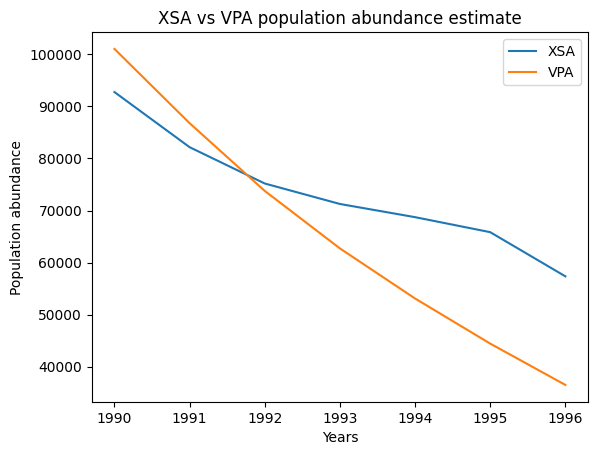

In [365]:
years = ['1990', '1991', '1992', '1993', '1994', '1995', '1996']
plt.plot(years, np.sum(N_ay, axis=0), label='XSA')
plt.plot(years, np.sum(N_ay_vpa, axis=0), label='VPA')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Population abundance')
plt.title('XSA vs VPA population abundance estimate')